# SOLVING THE 2D HEAT DIFFUSION EQUATION

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jupyter.lai.gwu.edu/user/nbakr10/notebooks/numerical-mooc/lessons/04_spreadout/figures/2dchip.svg")

In [13]:
import numpy as np
from matplotlib import pyplot 
%matplotlib inline

In [14]:
L = 0.01
nx, ny = 21, 21
dx = L/(nx-1)
dy = L/(ny-1)

x = np.linspace(0, L, num=nx)
y = np.linspace(0, L, num=ny)

alpha = 1e-4

# Initial Conditions 
T0 = np.full((ny, nx), 20.0)
T0[0, :] = 100.0  #bottom boundary
T0[:, 0] = 100.0 # left boundary

In [15]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    
    ny, nx = T.shape
    I, J = int(nx/2), int(ny/2) # indices at the center of the chip to know when it is 70 degrees
    
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1]  +  
                         sigma_x * (T[1:-1, :-2] - 2*T[1:-1, 1:-1] + T[1:-1, 2:]) + 
                         sigma_y * (T[:-2, 1:-1] - 2*T[1:-1, 1:-1] + T[2:, 1:-1]))
    
        # Update Boundary Values where you have a Neumann (derivative) condition
        T[:, -1] = T[:, -2] + qx * dx # right boundary at x = 0.01
        T[-1, :] = T[-2, :] + qy * dy # top boundary at y = 0.01
        
        #if the temp reaches 70 degrees, end the for loop early
        if T[J, I] >= 70.0:     
            break
    
    #print the time step and temperature when the for loop was broken
    print(n + 1, T[J, I])
    
    return T
    

In [26]:
nt = 500
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha)

256 70.02138294076661


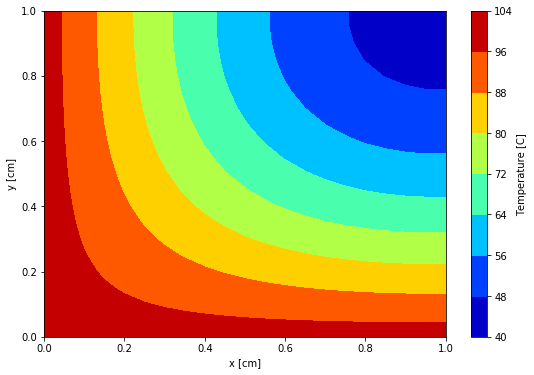

In [34]:
pyplot.figure(figsize=(9.0, 6.0))
pyplot.xlabel('x [cm]')
pyplot.ylabel('y [cm]')
contf = pyplot.contourf(x * 100, y * 100, T, cmap = 'jet');
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')